# <font color= darkred>By: Gyan Bahadur Magar</font>
# <font color= darkyellow>The Sparks Foudation - Intership (Feb 2021)</font>
## <font color = darkblue>Task Five: Exploratory Data Analysis - Sports (Level - Advanced)</font>
#### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### Suggest teams or players a company should endorse for its products.
#### if you want you guys can go through my github code I have explain step by step.

In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# importing csv dataset, we have two dataset deliveries and matches.
deliveries=pd.read_csv("Z:\intro\Sparktech\Indian Premier League\deliveries.csv")
matches=pd.read_csv("Z:\intro\Sparktech\Indian Premier League\matches.csv")

In [3]:
#looking at deliveries records
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#looking at matches
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.shape

(179078, 21)

In [6]:
#categorical so
deliveries["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [7]:
#sanity check on deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
matches.shape

(756, 18)

In [9]:
#sanity check on matches
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
deliveries.fillna(0,inplace=True)     #filling all the NaN values with 0

# Matches we have id and in deliveries we have match_id we can merge using this two

In [11]:
#Merge here, it will make easier.
merge=deliveries.merge(matches, left_on="match_id",right_on="id")

In [73]:
#lets see how our dataset look after merge
merge.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [13]:
merge.shape

(179078, 38)

In [14]:
deliveries.shape

(179078, 21)

In [15]:
matches.shape

(756, 17)

#### Here (21+17)=38  deliveries and matches columns are same after merging.

# 1. Now lets start with Batmen 
## Based on the runs they scored.
## Based the boundaries.
## Based on their strike rates.
## Death over batsmen.

#  top score batsmen

In [16]:
topscore_batsman=merge.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
topscore_batsman.head(10)

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


#### V Kholi has scored most runs 5434 in all the IPL seasons.

### Top ten most runs score in Indian Premier League (IPL).

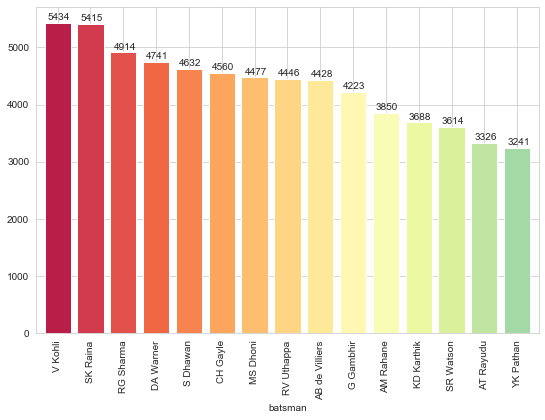

In [74]:
plt.subplots(figsize=(9,6))
run_filter=merge.groupby("batsman")
max_player_runs=run_filter['batsman_runs'].sum().sort_values(ascending=False)[:15].plot.bar(width=0.8,color=sb.color_palette('Spectral',20))
for p in max_player_runs.patches:
    max_player_runs.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=10)
plt.show()


# Top 10 Batsmen runs score by season.

In [18]:
most_runs_season=merge.groupby(["season","batsman"])["batsman_runs"].sum().sort_values(ascending=False).head(10).reset_index().drop_duplicates(keep="first")
most_runs_season.head(10)

,season,batsman,batsman_runs
0,2016,V Kohli,973
1,2016,DA Warner,848
2,2018,KS Williamson,747
3,2013,MEK Hussey,733
4,2012,CH Gayle,733
5,2019,DA Warner,727
6,2013,CH Gayle,720
7,2018,RR Pant,717
8,2016,AB de Villiers,687
9,2018,KL Rahul,678


## Batsmen runs score by years (years in decreasing order).

In [19]:
score_by_years=merge.groupby(["season","batsman"])["batsman_runs"].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset="season",keep="first").sort_values("season",ascending=False)
score_by_years

,season,batsman,batsman_runs
5,2019,DA Warner,727
2,2018,KS Williamson,747
11,2017,DA Warner,641
0,2016,V Kohli,973
25,2015,DA Warner,562
10,2014,RV Uthappa,660
3,2013,MEK Hussey,733
4,2012,CH Gayle,733
17,2011,CH Gayle,608
13,2010,SR Tendulkar,618


### 2019, DA Warner has score most runs 727.

# Highest Individual score

In [20]:
individual_score = merge.groupby(["match_id", "batsman"])["batsman_runs"].sum().sort_values(ascending=False).reset_index()
individual_score.sort_values('batsman_runs', ascending=0)
individual_score.head(10)

,match_id,batsman,batsman_runs
0,411,CH Gayle,175
1,60,BB McCullum,158
2,562,AB de Villiers,133
3,7935,RR Pant,130
4,620,AB de Villiers,129
5,372,CH Gayle,128
6,206,M Vijay,127
7,36,DA Warner,126
8,516,V Sehwag,122
9,7953,SR Watson,121


#### CH Gayle with 175 runs, has the most run in a single IPL match.

#  Top ten players who score most sixes

In [72]:
#this step we are filtering the 6 runs i.e bounderies
filter_six=merge['batsman_runs']==6
sixes=merge[filter_six]

In [22]:
six_runs=sixes.groupby("batsman")["batsman_runs"].count().sort_values(ascending=False).head(10).reset_index()

In [75]:
six_runs.head(10)

,batsman,batsman_runs
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


# CH Gayle is leading the the top 6 runs score.

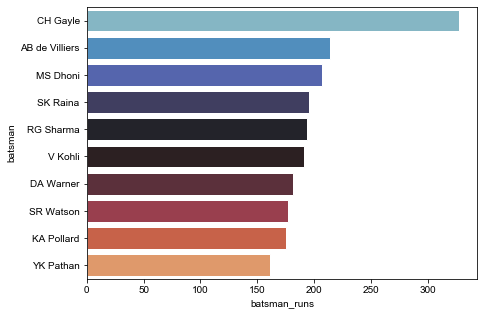

In [24]:
six_plot=six_runs
plt.subplots(figsize=(7,5))
sb.set_style("whitegrid")
sb.barplot(x='batsman_runs', y='batsman',palette="icefire", data=six_plot);

### So, there are the top ten players who score most sixes in IPL.

# Top ten players who score most sixes by season.

In [25]:
six_by_season=sixes.groupby(["season","batsman"])["batsman_runs"].count().sort_values(ascending=False).head(10).reset_index()

In [26]:
six_by_season.head(10)

,season,batsman,batsman_runs
0,2012,CH Gayle,59
1,2013,CH Gayle,52
2,2019,AD Russell,51
3,2011,CH Gayle,44
4,2015,CH Gayle,38
5,2016,V Kohli,38
6,2016,AB de Villiers,37
7,2018,RR Pant,37
8,2014,GJ Maxwell,36
9,2018,SR Watson,35


### CH Gayle is leading the most 6 runs scored in IPL.

#  Top ten players who score most fours

In [27]:
filter_four=merge['batsman_runs']==4
four_runs=merge[filter_four]

In [28]:
fours=four_runs.groupby("batsman")["batsman_runs"].count().sort_values(ascending=False).head(10).reset_index()
fours.head(10)

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


### S Dhawan has socred most for in IPL with 526 fours.

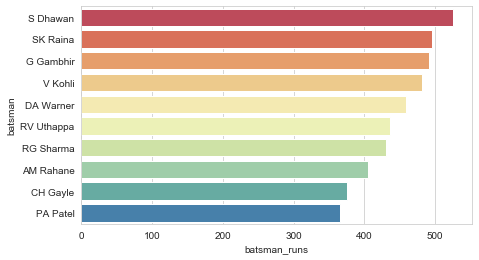

In [29]:
four_plot=fours
plt.subplots(figsize=(7,4))
sb.set_style("whitegrid")
sb.barplot(x='batsman_runs', y='batsman', palette=("Spectral"), data=four_plot);

### So, there are the top ten players who score most fours in IPL.

#  Top ten players who score most four by season

In [30]:
#2016 88 fours was the highest.
four_runs.groupby(["season","batsman"])["batsman_runs"].count().sort_values(ascending=False).head(10).reset_index()

,season,batsman,batsman_runs
0,2016,DA Warner,88
1,2010,SR Tendulkar,86
2,2016,V Kohli,84
3,2013,MEK Hussey,81
4,2014,RV Uthappa,74
5,2012,AM Rahane,73
6,2018,RR Pant,70
7,2008,G Gambhir,68
8,2010,JH Kallis,67
9,2018,KL Rahul,67


#### DA Warner has scored most four by season.

# Fours and sixes in all the Season

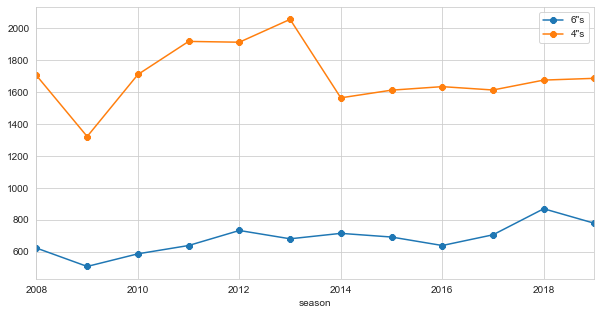

In [31]:

batsman = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
boundaries=batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
X=batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
boundaries=boundaries.merge(X,left_on='season',right_on='season',how='left')
# Renaming the columns 6"s and 4"s
boundaries=boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
boundaries.set_index('season')[['6"s','4"s']].plot(marker='8')
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()


# 2013 most 4 and 2018 most 6


#  Top Strike Rate batsman
## Strike rate = (Total Runs/ Total Balls)*100

### we have already calculated total runs score by the batsmen we are going to use that here 

In [32]:
topscore_batsman.head()

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632


###  Total number of balls that batsmen have faced.

In [33]:
total_balls=merge.groupby(['batsman'])["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index()

## we need two dataframes batsmen total runs and batsmen total balls they faced to calculate the strike rate

In [34]:
batsman_strikerate= pd.merge(topscore_batsman,total_balls,on="batsman",how='outer')

#### we are taking batsmen who have scores more than 1000 runs.


In [35]:
batsman_strikerate= batsman_strikerate[batsman_strikerate["batsman_runs"]>=1200]

## Calculating the batsmen strike rates the data we got

In [36]:
batsman_strikerate["strike_rate"]= (batsman_strikerate["batsman_runs"]/batsman_strikerate["ball"])*100
batsman_strikerate= batsman_strikerate[["batsman","strike_rate"]] 
# removing index and other columns
batsman_strikerate=batsman_strikerate.sort_values(by="strike_rate",ascending=False).reset_index(drop=True)

In [37]:
batsman_strikerate.head(10)

,batsman,strike_rate
0,AD Russell,179.950187
1,RR Pant,162.318841
2,GJ Maxwell,155.543237
3,JC Buttler,150.000000
4,V Sehwag,148.827059
5,AB de Villiers,148.740343
6,CH Gayle,145.640370
7,KA Pollard,141.751527
8,DA Warner,139.523249
9,CA Lynn,139.297125


### batsmen strike rates (over 1200 balls faced) AD Russell is leading with	Strike Rate = 179.950187.

###  Here we have top ten strike rates batmen (batsmen who have played more than 1200 balls in IPL).

# Death over batsmen
### The last 5 overs are consider as death overs 

In [38]:
# take only last 5 overs from 20 overs.
death_overs=merge[merge["over"]>15]

In [39]:
# filter1 will count all batsman for death overs 
filter1=death_overs.groupby('batsman')['batsman_runs'].count()
# now filter will only give us batsman who have faced more than 400 balls in death overs
filter2=filter1>400
# this step will give us values (otherwise 'all_batsman>400' will return bool)
filter_batsman=filter1[filter2]

In [40]:
filter_batsman.shape

(20,)

##### filter_batsman if you print this one you will get the answer but let filter it further for better result.

In [41]:
# this will contain batsman name list ['A Mishra','AB de Villiers',..]
batsman_namelist=filter1[filter2].index.tolist()
# this will only have dataset  of 56 batsman records(filter_batsman.shape).
filter_batsman=merge[merge["batsman"].isin(batsman_namelist)]
deathover_batsman=filter_batsman.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).reset_index()

In [42]:
deathover_batsman.head(10)

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,MS Dhoni,4477
4,AB de Villiers,4428
5,KD Karthik,3688
6,AT Rayudu,3326
7,YK Pathan,3241
8,KA Pollard,2784
9,Yuvraj Singh,2765


### Death overs batsmen board also lead by V Kholi.

# 2. Bowlers

##  Most wickets taker bowlers.
## Lowest Economy bowlers
#### As we know run-out is not creditted to the bowler that why we haven't  mention in dismissal_kinds

In [71]:
merge['dismissal_kind'].unique()

array([0, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [43]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
bowler=merge[merge["dismissal_kind"].isin(dismissal_kinds)]
most_wickets=bowler['bowler'].value_counts().reset_index().head(10)

In [44]:
most_wickets.head(10)

,index,bowler
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


### Here we can see SL Malinga is the highest wicket taker bowler with 170 wickets in IPL.

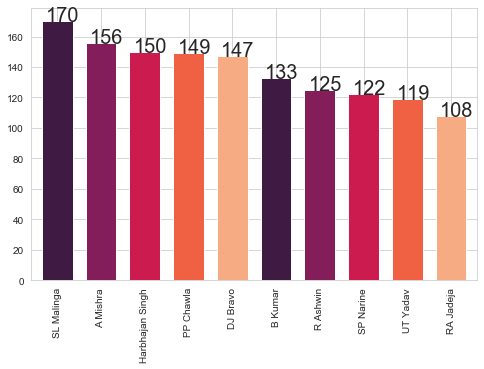

In [78]:
plt.subplots(figsize=(8,5))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
bowler=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=bowler['bowler'].value_counts()[:10].plot.bar(width=0.7,color=sb.color_palette("rocket",5))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=20)
plt.show()

#  Top 10 Lowest Economy Bowlers with mover than 400 Overs
### Economy Rate is an average of runs, a bowler conceded in every over, he bowls.
### Economy = total run given by bowler/ number of overs bowled by the bowler

In [46]:
economy=deliveries.groupby(['bowler']).sum()
economy['total balls']=deliveries['bowler'].value_counts()
economy['overs']=(economy['total balls']//6)
economy['economy']=(economy['total_runs']/(economy['overs']))
best_economy=economy[(economy['overs']>400)].sort_values('economy')[:10].economy.reset_index()

In [47]:
best_economy.head(10)

,bowler,economy
0,R Ashwin,6.754980
1,SP Narine,6.787529
2,Harbhajan Singh,7.043478
3,SL Malinga,7.092929
4,B Kumar,7.237251
5,A Mishra,7.291667
6,P Kumar,7.612756
7,RA Jadeja,7.614657
8,PP Chawla,7.895437
9,DJ Bravo,8.277162


### R Ashwin has the lowest economy in IPL 6.754980.

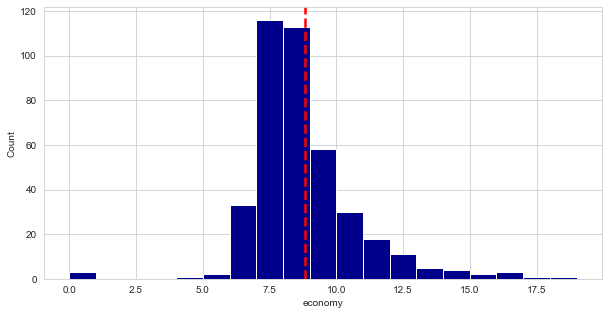

In [48]:
plt.subplots(figsize=(10,5))
economy.replace([np.inf, -np.inf], np.nan,inplace=True)
economy.fillna(0,inplace=True)
bins=range(0,20)
plt.hist(economy['economy'],bins,histtype="bar",color='darkblue')
name_list = [0.5,1,1.5,2,2.5]
plt.xlabel('economy')
plt.ylabel('Count')
plt.axvline(economy["economy"].mean(), color='red', linestyle='dashed', linewidth=2.5)
plt.plot()
plt.show()

### Here we can see that the average economy rate is between 8-9.

# 3.   Team and Toss

### Lets start with Toss 

In [49]:
toss=merge['toss_decision'].value_counts()

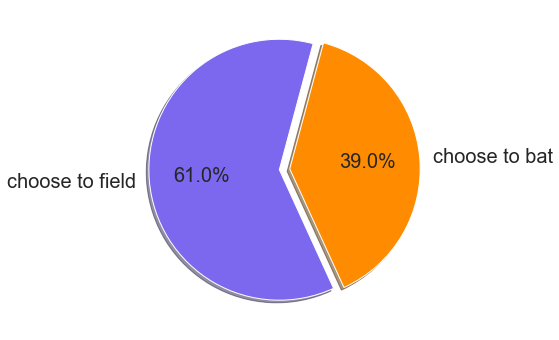

In [50]:
""" we can use this for simple and fast pie chart #toss.plot.pie(autopct="%.1f%%");"""
list(toss)
labels=['choose to field','choose to bat']
plt.pie(toss,labels=labels,colors=['mediumslateblue', 'darkorange'],startangle=75,shadow=True,explode=(0,0.08),autopct='%.1f%%',textprops={'fontsize': 20})
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

### We can see here that 61% team choose to field first if they win the toss.

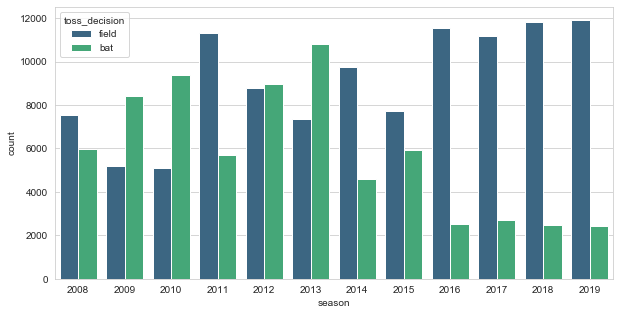

In [51]:
plt.subplots(figsize=(10,5))
sb.countplot(x='season',hue='toss_decision',palette="viridis",data=merge)
plt.show()

####  We can clear see that the chance of toss winner choosing to field first is very high compare to bat first.

# Chance of toss winner team to win the match.

#### chances of the toss winner is the winner of the match.

In [52]:
win_toss=matches[matches['toss_winner']==matches['winner']]

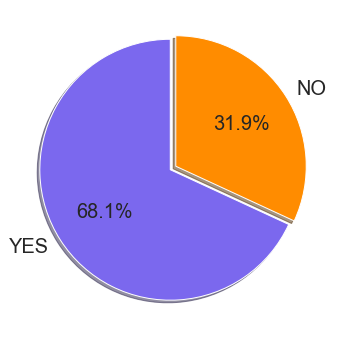

In [53]:
slices=[len(win_toss),(577-len(win_toss))]
labels=['YES','NO']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),colors=['mediumslateblue', 'darkorange'],autopct='%1.1f%%',textprops={'fontsize': 20})
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

### There is 68.1% chance to win the match if the team win the toss.

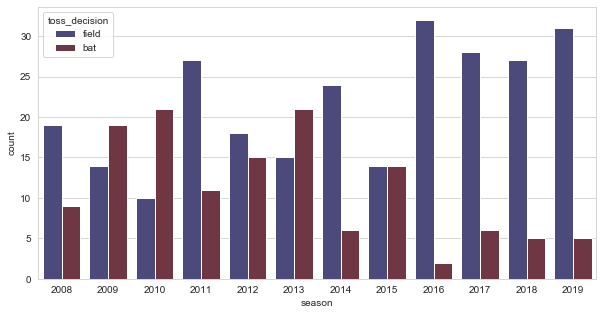

In [54]:
plt.subplots(figsize=(10,5))
sb.countplot(x='season',hue='toss_decision',palette="icefire",data=win_toss)
plt.show()

#### we can see that the toss winner team

#  Winning chances of a team chasing target 200 or more runs (IPL is 20 overs so 200 or more should be good target)
##  

### Runs scored in first and second innings 

In [55]:
max_score=merge.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
first_inning =max_score[max_score['inning']==1]
second_inning =max_score[max_score['inning']==2]

### Checking if first inning scored runs is grater than equal to second inning runs (YES or NO) and of it is true then the target not chased team wins.

In [56]:
first_inning = first_inning.merge(second_inning[['match_id','inning', 'total_runs']], on ='match_id')
first_inning.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)

# checking if the target runs given is greater than equal to 200 
first_inning = first_inning[first_inning['inning1_runs']>=200]
first_inning['score_chased'] = 1
first_inning['score_chased'] = np.where(first_inning['inning1_runs']<=first_inning['inning2_runs'], 'YES', 'N0')

In [57]:
first_inning.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,score_chased
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,2,172,N0
8,9,1,Delhi Daredevils,Rising Pune Supergiant,205,2,108,N0
19,20,1,Royal Challengers Bangalore,Gujarat Lions,213,2,192,N0
31,32,1,Sunrisers Hyderabad,Kings XI Punjab,207,2,181,N0
35,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209,2,161,N0


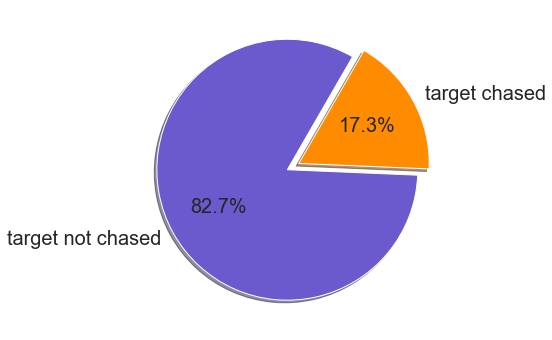

In [58]:
slices=first_inning['score_chased'].value_counts().reset_index().score_chased
list(slices)
labels=['target not chased','target chased']
plt.pie(slices,labels=labels,colors=['slateblue', 'darkorange'],startangle=60,shadow=True,explode=(0,0.1),autopct='%1.1f%%',textprops={'fontsize': 20})
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

###  The team who bat first and score more than 200 runs, has a very high probablity of winning the match (82%).

#  Team that win the most matches.

In [66]:
max_team=merge["winner"].value_counts()
max_team

Mumbai Indians                 26305
Chennai Super Kings            24087
Kolkata Knight Riders          21644
Royal Challengers Bangalore    19553
Kings XI Punjab                19469
Rajasthan Royals               17948
Delhi Daredevils               15709
Sunrisers Hyderabad            13786
Deccan Chargers                 7013
Gujarat Lions                   3063
Pune Warriors                   2883
Delhi Capitals                  2436
Rising Pune Supergiant          2383
Kochi Tuskers Kerala            1322
Rising Pune Supergiants         1105
Name: winner, dtype: int64

# Mumbai Indian has won the most matches in the IPL seasons.

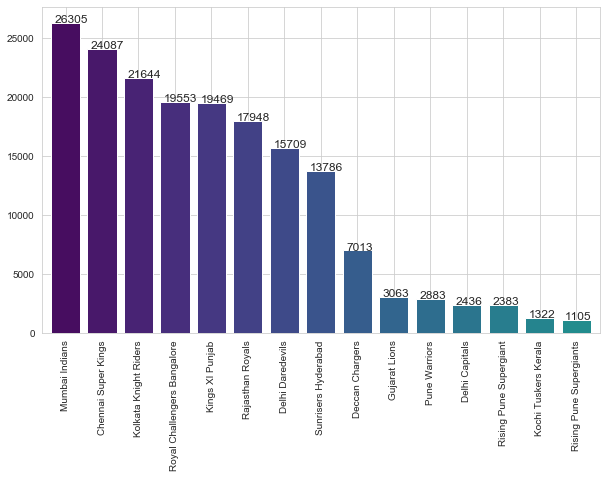

In [67]:
plt.subplots(figsize=(10,6))
max_plot=max_team.plot.bar(width=0.8,color=sb.color_palette("viridis",30))
for i in max_plot.patches:
    max_plot.annotate(format(i.get_height()), (i.get_x()+0.10, i.get_height()),fontsize=12)
plt.show()

# Team who win most IPL.

In [61]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
ipl_win=finals['winner'].value_counts().reset_index()
ipl_win

,index,winner
0,Mumbai Indians,4
1,Chennai Super Kings,3
2,Kolkata Knight Riders,2
3,Deccan Chargers,1
4,Rajasthan Royals,1
5,Sunrisers Hyderabad,1


### Mumbai indians is leading the board and won 4 IPL seasons.

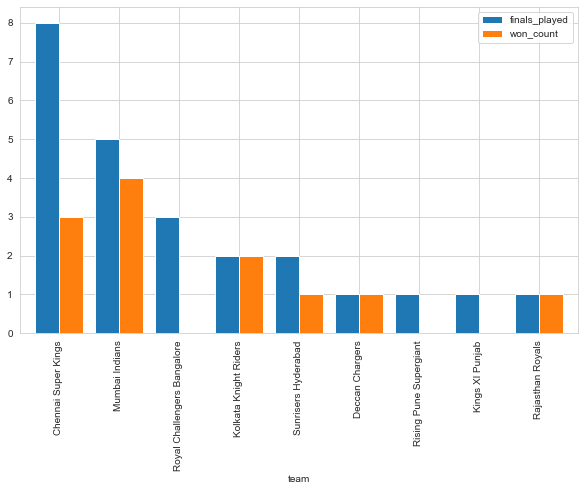

In [62]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
max_final=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
max_final.rename({'index':'team',0:'count'},axis=1,inplace=True)
filtr=finals['winner'].value_counts().reset_index()
max_final=max_final.merge(filtr,left_on='team',right_on='index',how='outer')
max_final=max_final.replace(np.NaN,0)
max_final.drop('index',axis=1,inplace=True)
max_final.set_index('team',inplace=True)
max_final.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
max_final.plot.bar(width=0.8)
plt.gcf().set_size_inches(10,6)
plt.show()

#### From this we can say CSK has played 8 final matches and won 3 IPL
#### where MI has played 5 IPL final matches and won 4 time so we CSK and MI has high chances of winning next IPL.

# <font color = blue>Cricket is a team game all players has their roles that helps team to win the match.</font>
## <font color = blue> We are not picking players for teams. here we are suggesting teams or players a company should endorse for its products so we can go for top players we which have get for our analysis. </font>
## Batsmen (key players-batsmen) 
#### we pick top 10 playeres based on these factors for batsmen:- topscore_batsman, most_runs_season score_by_years, individual_scores, six_runs, six_by_season, fours, batsman_strikerate, death_overs.


- V Kohli
- SK Raina	 
- RG Sharma	 
- DA Warner	 
- S Dhawan	 
- CH Gayle	 
- MS Dhoni	 
- RV Uthappa	 
- AB de Villiers	 
- G Gambhir
- KS Williamson 
- RR Pant 
- KL Rahul
- BB McCullum
- SR Watson
- AD Russell	
- KD Karthik	 
- AT Rayudu	 
- YK Pathan	 
- KA Pollard	 
- Yuvraj Singh

## Bowler (key players - bowlers
#### we pick top 10 players based on these factors for bowlers:-  high wicket and best economy bowler.
- SL Malinga	 
- A Mishra	 
- Harbhajan Singh
- PP Chawla 
- DJ Bravo
- B Kumar
- R Ashwin
- SP Narine 
- UT Yadav
- RA Jadeja
- P Kumar
- DJ Bravo

# Team (from 8 total team this top 3 team who has win most matches and IPL finals.)
- Mumbai Indians (MI)
- Chennai super kings (CSK)
- Kolkota Knight Rides (KKR)

note:- if we were doing best player selection for a team then we have to go with little different approch like use different ML algorithms to predict how's the players performance based on years/seasons and new players performance etc.

# <font color = yellow> Thank you </font>